In [1]:
from sklearn.metrics import ndcg_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
def round_up(entry):
    
    rounded_up = [round(num, 2) for num in entry]
    
    return rounded_up        

In [4]:
import math

def ndcg(truth, score, at):
    
    if not len(score) == len(truth):
        return "Error, the size of 'truth' and 'score' must be the same"
    
    g = score
    g_i = truth
    
#     print('g: {}'.format(g))
#     print('g_i: {}'.format(g_i))
#     print()
    
    
#  Swap 'score' and 'truth' from places if score > truth, this way does not bug the calculation
    aux_g = g.copy()
    aux_g_i = g_i.copy()

    for idx in range(0, len(g)): 
        if g[idx] > g_i[idx]:
            aux_g_i[idx] = g[idx]
            aux_g[idx] = g_i[idx]
            
    g = aux_g
    g_i = aux_g_i
    
#     print('corrected g: {}'.format(g))
#     print('correctedg_i: {}'.format(g_i))
#     print()

    cg = []
    cg_i = []
    
# # Calculates CG and CGi
    for idx in range(0, len(g)): 
        if idx == 0:
            cg.insert(idx, g[idx])
            cg_i.insert(idx, g_i[idx])
        else:
            cg.insert(idx, cg[idx-1] + g[idx])
            cg_i.insert(idx, cg_i[idx-1] + g_i[idx])
    
            
#     print('cg: {}'.format(cg))
#     print('cg_i: {}'.format(cg_i))
#     print()
    
    dcg = []
    dcg_i = []
    
# # Calculates DCG and DCGi
    for idx in range(0, len(g)): 
        if idx == 0 :
            dcg.insert(idx, round(cg[idx], 2))
            dcg_i.insert(idx, round(cg_i[idx], 2))
        else:
            dcg.insert(idx, dcg[idx-1] + round((g[idx] / math.log2(idx+1)), 2) )
            dcg_i.insert(idx, dcg_i[idx-1] + round((g_i[idx] / math.log2(idx+1)), 2) )
            
#     print('dcg: {}'.format(dcg))
#     print('dcg_i: {}'.format(dcg_i))
#     print()
    
# # Calculates nDCG@  = DCG@ / DCGi@
#     print('TESTE at={}, at-1={}, dcg[at-1]={}, dcg_i[at-1]={}'.format(at, at-1, dcg[at-1], dcg_i[at-1]))
    ndcg_value = round(dcg[at-1] / dcg_i[at-1], 2)
    
#     print('ndcg@{} = {}'.format(at, ndcg_value))
   
    return ndcg_value

In [5]:
# ndcg([0.8,0.5,0.4], [0.6,0.4,0.3], 3)

In [6]:
ndcg([0.4, 1, 0.4, 0.4, 0.2, 1, 0.6, 0.4, 0.5, 0.6], [0.799,0.71,0.721,0.702,0.684,0.703,0.763,0.738,0.651,0.678], 10)

0.62

In [7]:
g31_b = [3.0,1.0,4.0,2.0,3.5,3.0,2.0,1.5,1.5,3.5]
g32_b = [3.5,4.5,1.0,3.5,3.0,4.5,3.5,3.4,2.4,1.7]
g33_b = [3.0,2.5,3.5,2.5,1.5,1.0,3.5,3.4,2.5,2.5]
g51_b = [2.5,2.5,2.0,4.5,2.5,1.4,1.9,1.1,2.9,2.5]
g52_b = [3.7,3.0,3.0,2.7,2.5,3.0,3.3,3.8,3.0,3.5]
g53_b = [4.4,2.0,3.0,3.8,3.5,3.666666667,2.833333333,3.166666667,3.5,4.0]

In [8]:
def convert_rating_to_relevance(ratings):
    result = []    
    for item in ratings:
        aux = item/5
        result.append(aux)
    return result

In [9]:
# print(convert_rating_to_relevance(bla))

In [10]:
def set_baseline_lists():
    
    groups_baseline = []
    
    
    g31_baseline = round_up(convert_rating_to_relevance(g31_b))
    g32_baseline = round_up(convert_rating_to_relevance(g32_b))
    g33_baseline = round_up(convert_rating_to_relevance(g33_b))
    g51_baseline = round_up(convert_rating_to_relevance(g51_b))
    g52_baseline = round_up(convert_rating_to_relevance(g52_b))  
    g53_baseline = round_up(convert_rating_to_relevance(g53_b))
    
    groups_baseline.append(g31_baseline)
    groups_baseline.append(g32_baseline)
    groups_baseline.append(g33_baseline)
    groups_baseline.append(g51_baseline)
    groups_baseline.append(g52_baseline)
    groups_baseline.append(g53_baseline)
    
    return groups_baseline

In [11]:
groups_baseline = set_baseline_lists()

for item in groups_baseline:
    print(item)

[0.6, 0.2, 0.8, 0.4, 0.7, 0.6, 0.4, 0.3, 0.3, 0.7]
[0.7, 0.9, 0.2, 0.7, 0.6, 0.9, 0.7, 0.68, 0.48, 0.34]
[0.6, 0.5, 0.7, 0.5, 0.3, 0.2, 0.7, 0.68, 0.5, 0.5]
[0.5, 0.5, 0.4, 0.9, 0.5, 0.28, 0.38, 0.22, 0.58, 0.5]
[0.74, 0.6, 0.6, 0.54, 0.5, 0.6, 0.66, 0.76, 0.6, 0.7]
[0.88, 0.4, 0.6, 0.76, 0.7, 0.73, 0.57, 0.63, 0.7, 0.8]


In [12]:
def set_ground_truth_lists():
    
    groups_ground_truth = []
    
#     g31_ground_truth = round_up([2,5,2,2,1,5,3,2,2.5,3])
#     g32_ground_truth = round_up([2,3,3.5,2.5,4,2.5,4.5,1.5,4.5,4.5])
#     g33_ground_truth = round_up([4.5, 4, 3.5, 3.5, 4, 2.5, 4, 4, 2.5, 3.5])
#     g51_ground_truth = round_up([3.5, 2, 2.5, 2, 4.5, 4, 1, 4, 4, 1.5])
#     g52_ground_truth = round_up([2.5, 4, 2.5, 2.7, 3, 4, 2, 2, 3.7, 3])
#     g53_ground_truth = round_up([3, 5, 3, 4, 2, 4, 3.5, 3.5, 3, 3])
    
    g31_ground_truth = round_up([0.4, 1, 0.4, 0.4, 0.2, 1, 0.6, 0.4, 0.5, 0.6])
    g32_ground_truth = round_up([0.4, 0.6, 0.7, 0.5, 0.8, 0.5, 0.9, 0.3, 0.9, 0.9])
    g33_ground_truth = round_up([0.9, 0.8, 0.7, 0.7, 0.8, 0.5, 0.8, 0.8, 0.5, 0.7])
    g51_ground_truth = round_up([0.7, 0.4, 0.5, 0.4, 0.9, 0.8, 0.2, 0.8, 0.8, 0.3])
    g52_ground_truth = round_up([0.5, 0.8, 0.5, 0.54, 0.6, 0.8, 0.4, 0.4, 0.74, 0.6])  
    g53_ground_truth = round_up([0.6, 1, 0.6, 0.8, 0.4, 0.8, 0.7, 0.7, 0.6, 0.6])
    
    groups_ground_truth.append(g31_ground_truth)
    groups_ground_truth.append(g32_ground_truth)
    groups_ground_truth.append(g33_ground_truth)
    groups_ground_truth.append(g51_ground_truth)
    groups_ground_truth.append(g52_ground_truth)
    groups_ground_truth.append(g53_ground_truth)
    
    return groups_ground_truth

In [13]:
groups_ground_truth = set_ground_truth_lists()

for item in groups_ground_truth:
    print(item)

[0.4, 1, 0.4, 0.4, 0.2, 1, 0.6, 0.4, 0.5, 0.6]
[0.4, 0.6, 0.7, 0.5, 0.8, 0.5, 0.9, 0.3, 0.9, 0.9]
[0.9, 0.8, 0.7, 0.7, 0.8, 0.5, 0.8, 0.8, 0.5, 0.7]
[0.7, 0.4, 0.5, 0.4, 0.9, 0.8, 0.2, 0.8, 0.8, 0.3]
[0.5, 0.8, 0.5, 0.54, 0.6, 0.8, 0.4, 0.4, 0.74, 0.6]
[0.6, 1, 0.6, 0.8, 0.4, 0.8, 0.7, 0.7, 0.6, 0.6]


In [14]:
def set_scores_lists():
    
    groups_scores = []
    
#     g31_scores = round_up([3.995,3.55,3.605,3.51,3.42,3.515,3.815,3.69,3.255,3.39])
#     g32_scores = round_up([3.69,3.63,3.26,3.32,3.49,3.05,2.86,2.875,3.41,3.08])
#     g33_scores = round_up([3.59,3.46,3.29,3.305,3.245,3.355,3.17,3.465,3.15,3.215])
#     g51_scores = round_up([4.02,3.345,3.735,3.235,3.42,3.835,3.125,3.53,3.135,3.29])
#     g52_scores = round_up([4.075,3.675,3.41,3.3,3.375,3.36,3.275,3.825,3.245,3.2])
#     g53_scores = round_up([4.18,4.15,3.86,3.715,3.73,3.47,4.045,3.36,3.765,3.86])

    g31_scores = round_up([0.799,0.71,0.721,0.702,0.684,0.703,0.763,0.738,0.651,0.678])
    g32_scores = round_up([0.738,0.726,0.652,0.664,0.698,0.61,0.572,0.575,0.682,0.616])
    g33_scores = round_up([0.718,0.692,0.658,0.661,0.649,0.671,0.634,0.693,0.63,0.643])
    g51_scores = round_up([0.804,0.669,0.747,0.647,0.684,0.767,0.625,0.706,0.627,0.658])
    g52_scores = round_up([0.815,0.735,0.682,0.66,0.675,0.672,0.655,0.765,0.649,0.64])
    g53_scores = round_up([0.836,0.83,0.772,0.743,0.746,0.694,0.809,0.672,0.753,0.772])
    
    
    groups_scores.append(g31_scores)
    groups_scores.append(g32_scores)
    groups_scores.append(g33_scores)
    groups_scores.append(g51_scores)
    groups_scores.append(g52_scores)
    groups_scores.append(g53_scores)
    
    return groups_scores

In [15]:
groups_scores = set_scores_lists()

for item in groups_scores:
    print(item)

[0.8, 0.71, 0.72, 0.7, 0.68, 0.7, 0.76, 0.74, 0.65, 0.68]
[0.74, 0.73, 0.65, 0.66, 0.7, 0.61, 0.57, 0.57, 0.68, 0.62]
[0.72, 0.69, 0.66, 0.66, 0.65, 0.67, 0.63, 0.69, 0.63, 0.64]
[0.8, 0.67, 0.75, 0.65, 0.68, 0.77, 0.62, 0.71, 0.63, 0.66]
[0.81, 0.73, 0.68, 0.66, 0.68, 0.67, 0.66, 0.77, 0.65, 0.64]
[0.84, 0.83, 0.77, 0.74, 0.75, 0.69, 0.81, 0.67, 0.75, 0.77]


In [16]:
def calculate_ndcg_at(ground_truth, score, at):
    
    groups_ndcg = []
    
    for i in range(0,6):
#         g_ndcg = round( ndcg_score(np.asarray([ground_truth[i]]), np.asarray([score[i]]),at) , 4 )
        g_ndcg = round( ndcg(ground_truth[i], score[i], at) , 4 )
        groups_ndcg.append(g_ndcg)
        
    return groups_ndcg   

In [17]:
groups_ndcg_at_3 = calculate_ndcg_at(groups_ground_truth, groups_scores, 3)
print(groups_ndcg_at_3)

[0.6, 0.74, 0.86, 0.73, 0.76, 0.78]


In [18]:
groups_ndcg_at_5 = calculate_ndcg_at(groups_ground_truth, groups_scores, 5)
print(groups_ndcg_at_5)

[0.57, 0.76, 0.86, 0.72, 0.78, 0.77]


In [19]:
groups_ndcg_at_10 = calculate_ndcg_at(groups_ground_truth, groups_scores, 10)
print(groups_ndcg_at_10)

[0.62, 0.73, 0.85, 0.72, 0.77, 0.8]


Text(0.5, 1.0, 'nDCG at 3 performance over groups')

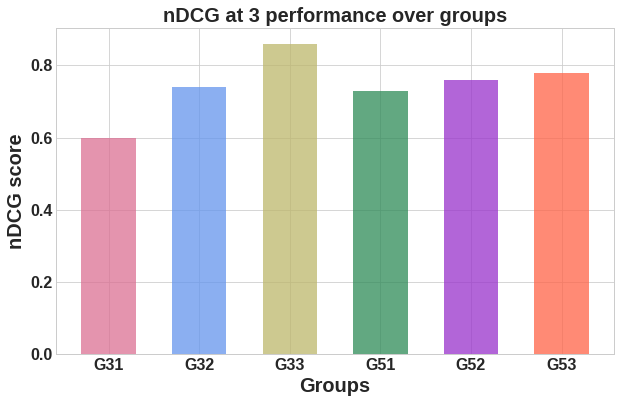

In [20]:
plt.rcParams['figure.figsize'] = (10,6)

groups = ('G31', 'G32', 'G33', 'G51', 'G52', 'G53')
y_pos = np.arange(len(groups))
ndcg_at_3 = groups_ndcg_at_3

plt.bar(groups, ndcg_at_3, width=0.6, align='center', alpha=0.75, color=['palevioletred', 'cornflowerblue', 'darkkhaki', 'seagreen', 'darkorchid', 'tomato'])
plt.xticks(y_pos, groups, fontweight="bold", fontsize=16)
plt.yticks(fontweight="bold", fontsize=16)
plt.ylabel('nDCG score',fontweight="bold", fontsize=20)
plt.xlabel('Groups',fontweight="bold", fontsize=20)
plt.title('nDCG at 3 performance over groups',fontweight="bold", fontsize=20)

# plt.savefig('ndcg@3.png', transparent=True)

Text(0.5, 1.0, 'nDCG at 5 performance over groups')

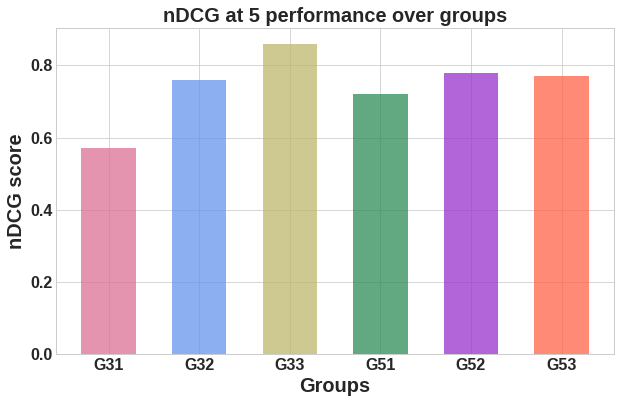

In [21]:
plt.rcParams['figure.figsize'] = (10,6)

groups = ('G31', 'G32', 'G33', 'G51', 'G52', 'G53')
y_pos = np.arange(len(groups))
ndcg_at_5 = groups_ndcg_at_5

plt.bar(groups, ndcg_at_5, width=0.6, align='center', alpha=0.75, color=['palevioletred', 'cornflowerblue', 'darkkhaki', 'seagreen', 'darkorchid', 'tomato'])
plt.xticks(y_pos, groups, fontweight="bold", fontsize=16)
plt.yticks(fontweight="bold", fontsize=16)
plt.ylabel('nDCG score',fontweight="bold", fontsize=20)
plt.xlabel('Groups',fontweight="bold", fontsize=20)
plt.title('nDCG at 5 performance over groups',fontweight="bold", fontsize=20)

# plt.savefig('ndcg@5.png', transparent=True)

Text(0.5, 1.0, 'nDCG at 10 performance over groups')

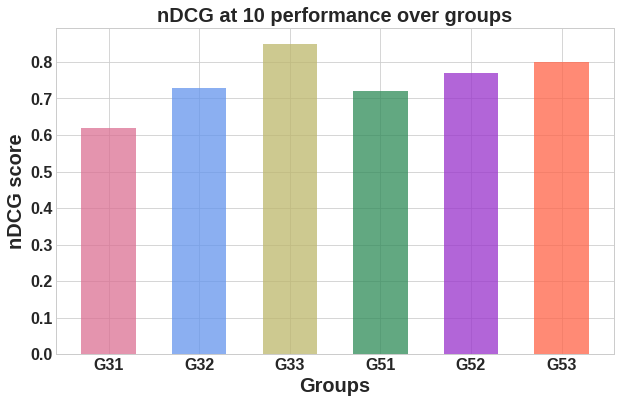

In [22]:
plt.rcParams['figure.figsize'] = (10,6)

groups = ('G31', 'G32', 'G33', 'G51', 'G52', 'G53')
y_pos = np.arange(len(groups))
ndcg_at_10 = groups_ndcg_at_10

plt.bar(groups, ndcg_at_10, width=0.6, align='center', alpha=0.75, color=['palevioletred', 'cornflowerblue', 'darkkhaki', 'seagreen', 'darkorchid', 'tomato'])
plt.xticks(y_pos, groups, fontweight="bold", fontsize=16)
plt.yticks(fontweight="bold", fontsize=16)
plt.ylabel('nDCG score',fontweight="bold", fontsize=20)
plt.xlabel('Groups',fontweight="bold", fontsize=20)
plt.title('nDCG at 10 performance over groups',fontweight="bold", fontsize=20)

# plt.savefig('ndcg@10.png', transparent=True)

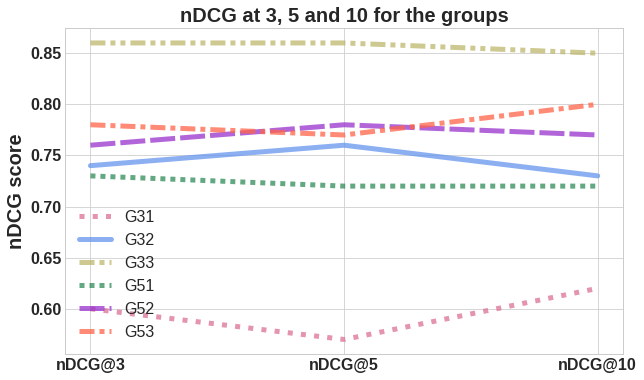

In [23]:
plt.rcParams['figure.figsize'] = (10,6)


from collections import OrderedDict

linestyles = OrderedDict(
    [('solid',               (0, ())),
     
     ('dotted',              (0, (1, 5))),
     ('dashed',              (0, (5, 5))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     
     ('loosely dotted',      (0, (1, 10))),
     ('loosely dashed',        (0, (5, 10))),
     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     
     ('densely dotted',        (0, (1, 1))),
     ('densely dashed',        (0, (5, 1))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])


ndcg_at = ['nDCG@3','nDCG@5','nDCG@10']

opacity = 0.75

g31 = [groups_ndcg_at_3[0], groups_ndcg_at_5[0], groups_ndcg_at_10[0]]
g32 = [groups_ndcg_at_3[1], groups_ndcg_at_5[1], groups_ndcg_at_10[1]]
g33 = [groups_ndcg_at_3[2], groups_ndcg_at_5[2], groups_ndcg_at_10[2]]
g51 = [groups_ndcg_at_3[3], groups_ndcg_at_5[3], groups_ndcg_at_10[3]]
g52 = [groups_ndcg_at_3[4], groups_ndcg_at_5[4], groups_ndcg_at_10[4]]
g53 = [groups_ndcg_at_3[5], groups_ndcg_at_5[5], groups_ndcg_at_10[5]]

p_g31, = plt.plot(ndcg_at, g31, color='palevioletred', linestyle=':', linewidth=5.0, alpha=opacity)
p_g32, = plt.plot(ndcg_at, g32, color='cornflowerblue', linestyle='solid', linewidth=5.0, alpha=opacity)
p_g33, = plt.plot(ndcg_at, g33, color='darkkhaki', linestyle=linestyles['densely dashdotdotted'], linewidth=5.0, alpha=opacity)
p_g51, = plt.plot(ndcg_at, g51, color='seagreen', linestyle=linestyles['densely dotted'], linewidth=5.0, alpha=opacity)
p_g52, = plt.plot(ndcg_at, g52, color='darkorchid', linestyle=linestyles['densely dashed'], linewidth=5.0, alpha=opacity)
p_g53, = plt.plot(ndcg_at, g53, color='tomato', linestyle=linestyles['densely dashdotted'], linewidth=5.0, alpha=opacity)

# plt.xlabel('nDCG at',fontweight="bold", fontsize=24)
plt.ylabel('nDCG score',fontweight="bold", fontsize=20)
plt.title('nDCG at 3, 5 and 10 for the groups',fontweight="bold", fontsize=20)
plt.xticks(ndcg_at, ('nDCG@3','nDCG@5','nDCG@10'), fontweight="bold", fontsize=16)
plt.yticks(fontweight="bold", fontsize=16)

plt.legend([p_g31, p_g32, p_g33, p_g51, p_g52, p_g53],['G31','G32','G33','G51','G52','G53'], fontsize=16)

# plt.savefig('ndcg@3_5_10.png', transparent=True)
plt.show()

In [24]:
from sklearn.metrics import precision_score

# # # # # # # # # # PRECISION Module # # # # # # # # # #    

def binary_mean(movies_mean, cutoff):
    binary_mean = []
    returned_movies = []
    for item in movies_mean:
        if item >= cutoff:
            binary_mean.append(1)
        else:
            binary_mean.append(0)

        returned_movies.append(1)

    return precision_score(binary_mean, returned_movies)


def precision_at(movies_list, cutoff, at):

#     print("movies_list: {},\t cutoff: {}\n".format(movies_list, cutoff))

    precision = binary_mean(movies_list[:at], cutoff)
    return precision

In [25]:
# score_g1 = [0.8, 0.71, 0.72, 0.7, 0.68, 0.7, 0.76, 0.74, 0.65, 0.68]

In [26]:
at = 10
cufoff = 0.7

groups_p_at_10 = []
groups_p_at_5 = []
groups_p_at_3 = []

for idx in range(0,6):
    precision = precision_at(groups_scores[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_p_at_10.append(precision)
    
print("Precision @ 10 for the GROUPS: {}\n".format(groups_p_at_10))


at = 5

for idx in range(0,6):
    precision = precision_at(groups_scores[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_p_at_5.append(precision)
    
print("Precision @ 5 for the GROUPS: {}\n".format(groups_p_at_5))


at = 3

for idx in range(0,6):
    precision = precision_at(groups_scores[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_p_at_3.append(precision)
    
print("Precision @ 3 for the GROUPS: {}\n".format(groups_p_at_3))

Precision @ 10 for the GROUPS: [0.7, 0.3, 0.1, 0.4, 0.3, 0.8]

Precision @ 5 for the GROUPS: [0.8, 0.6, 0.2, 0.4, 0.4, 1.0]

Precision @ 3 for the GROUPS: [1.0, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 1.0]



[1.0, 0.8, 0.7] [0.6666666666666666, 0.6, 0.3] [0.3333333333333333, 0.2, 0.1] [0.6666666666666666, 0.4, 0.4] [0.6666666666666666, 0.4, 0.3] [1.0, 1.0, 0.8]


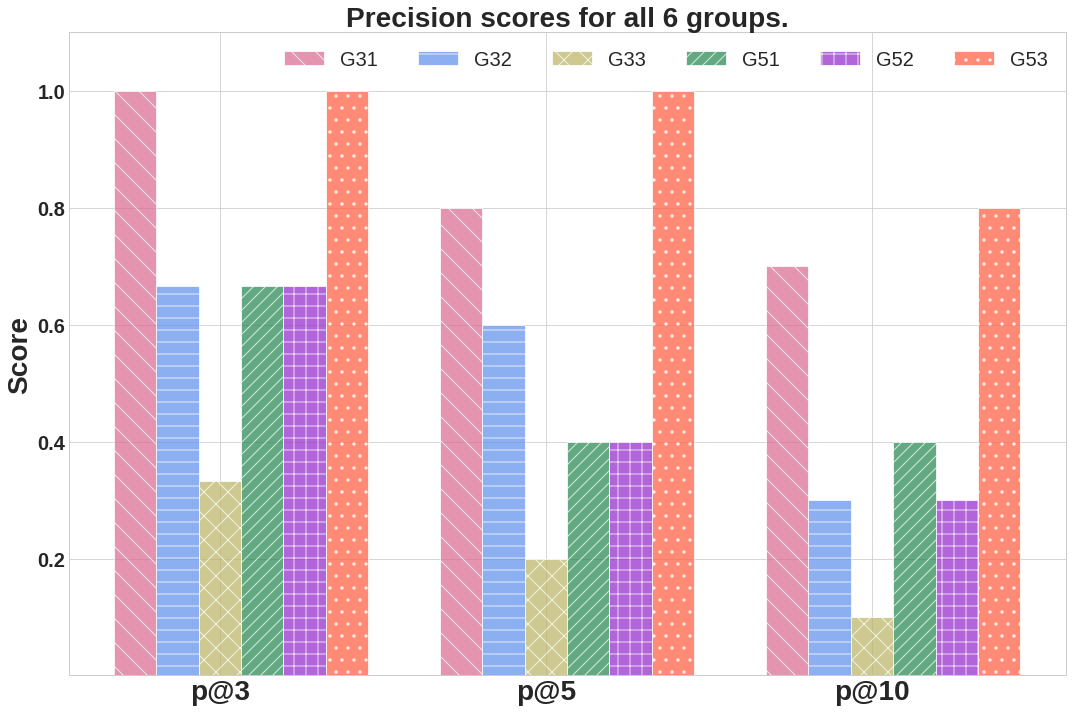

In [27]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 3
precision_g_31 = [groups_p_at_3[0], groups_p_at_5[0], groups_p_at_10[0]]
precision_g_32 = [groups_p_at_3[1], groups_p_at_5[1], groups_p_at_10[1]]
precision_g_33 = [groups_p_at_3[2], groups_p_at_5[2], groups_p_at_10[2]]
precision_g_51 = [groups_p_at_3[3], groups_p_at_5[3], groups_p_at_10[3]]
precision_g_52 = [groups_p_at_3[4], groups_p_at_5[4], groups_p_at_10[4]]
precision_g_53 = [groups_p_at_3[5], groups_p_at_5[5], groups_p_at_10[5]]

# m_baseline = [m_bl_p3, m_bl_p5, m_bl_p10]
# m_standard = [m_p3_s, m_p5_s, m_p10_s]
# m_greedy = [m_p3_g, m_p5_g, m_p10_g]
# m_random = [m_p3_r, m_p5_r, m_p10_r]

print(precision_g_31, precision_g_32, precision_g_33, precision_g_51, precision_g_52, precision_g_53)

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.13
opacity = 0.75

line1 = plt.bar(index, precision_g_31, bar_width, alpha=opacity, color='palevioletred', label='G31', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, precision_g_32, bar_width, alpha=opacity, color='cornflowerblue',  label='G32', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, precision_g_33, bar_width, alpha=opacity, color='darkkhaki', label='G33', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, precision_g_51, bar_width, alpha=opacity, color='seagreen', label='G51', hatch="//", edgecolor='white')
line5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, precision_g_52, bar_width, alpha=opacity, color='darkorchid', label='G52', hatch="+", edgecolor='white')
line6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, precision_g_53, bar_width, alpha=opacity, color='tomato', label='G53', hatch=".", edgecolor='white')


# plt.xlabel('Precision@', fontweight="bold", fontsize=28)
plt.ylabel('Score', fontweight="bold", fontsize=28)
plt.title('Precision scores for all 6 groups.', fontweight="bold", fontsize=28)
plt.xticks(index + bar_width + bar_width, ('p@3', 'p@5', 'p@10'), fontweight="bold", fontsize=28)
plt.yticks(fontweight="bold", fontsize=20)

plt.legend(fontsize=20, ncol=6)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.001,1.1])

# plt.savefig('pecrision_scores_prop_apprch_all_groups.png', transparent=True)
plt.tight_layout()
plt.show()

In [28]:
## Calculate preciosion levels for proposal score

at = 10
cufoff = 0.7

groups_score_p_at_10 = []
groups_score_p_at_5 = []
groups_score_p_at_3 = []

for idx in range(0,6):
    precision = precision_at(groups_scores[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_score_p_at_10.append(precision)
    
print("Precision @ 10 for the GROUPS: {}\n".format(groups_score_p_at_10))


at = 5

for idx in range(0,6):
    precision = precision_at(groups_scores[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_score_p_at_5.append(precision)
    
print("Precision @ 5 for the GROUPS: {}\n".format(groups_score_p_at_5))


at = 3

for idx in range(0,6):
    precision = precision_at(groups_scores[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_score_p_at_3.append(precision)
    
print("Precision @ 3 for the GROUPS: {}\n".format(groups_score_p_at_3))

Precision @ 10 for the GROUPS: [0.7, 0.3, 0.1, 0.4, 0.3, 0.8]

Precision @ 5 for the GROUPS: [0.8, 0.6, 0.2, 0.4, 0.4, 1.0]

Precision @ 3 for the GROUPS: [1.0, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 1.0]



In [29]:
## Calculate preciosion levels for baseline

at = 10
cufoff = 0.7

groups_baseline_p_at_10 = []
groups_baseline_p_at_5 = []
groups_baseline_p_at_3 = []

for idx in range(0,6):
    precision = precision_at(groups_baseline[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_baseline_p_at_10.append(precision)
    
print("Precision @ 10 for the GROUPS: {}\n".format(groups_baseline_p_at_10))


at = 5

for idx in range(0,6):
    precision = precision_at(groups_baseline[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_baseline_p_at_5.append(precision)
    
print("Precision @ 5 for the GROUPS: {}\n".format(groups_baseline_p_at_5))


at = 3

for idx in range(0,6):
    precision = precision_at(groups_baseline[idx], cufoff, at)
#     print("Precision @ {} for GROUP {} : {}\n\n".format(at, idx+1, precision))
    groups_baseline_p_at_3.append(precision)
    
print("Precision @ 3 for the GROUPS: {}\n".format(groups_baseline_p_at_3))

Precision @ 10 for the GROUPS: [0.3, 0.5, 0.2, 0.1, 0.3, 0.6]

Precision @ 5 for the GROUPS: [0.4, 0.6, 0.2, 0.2, 0.2, 0.6]

Precision @ 3 for the GROUPS: [0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.0, 0.3333333333333333, 0.3333333333333333]



[1.0, 0.8, 0.7] [0.6666666666666666, 0.6, 0.3] [0.3333333333333333, 0.2, 0.1] [0.6666666666666666, 0.4, 0.4] [0.6666666666666666, 0.4, 0.3] [1.0, 1.0, 0.8]
###
[0.3333333333333333, 0.4, 0.3] [0.6666666666666666, 0.6, 0.5] [0.3333333333333333, 0.2, 0.2] [0.0, 0.2, 0.1] [0.3333333333333333, 0.2, 0.3] [0.3333333333333333, 0.6, 0.6]
###


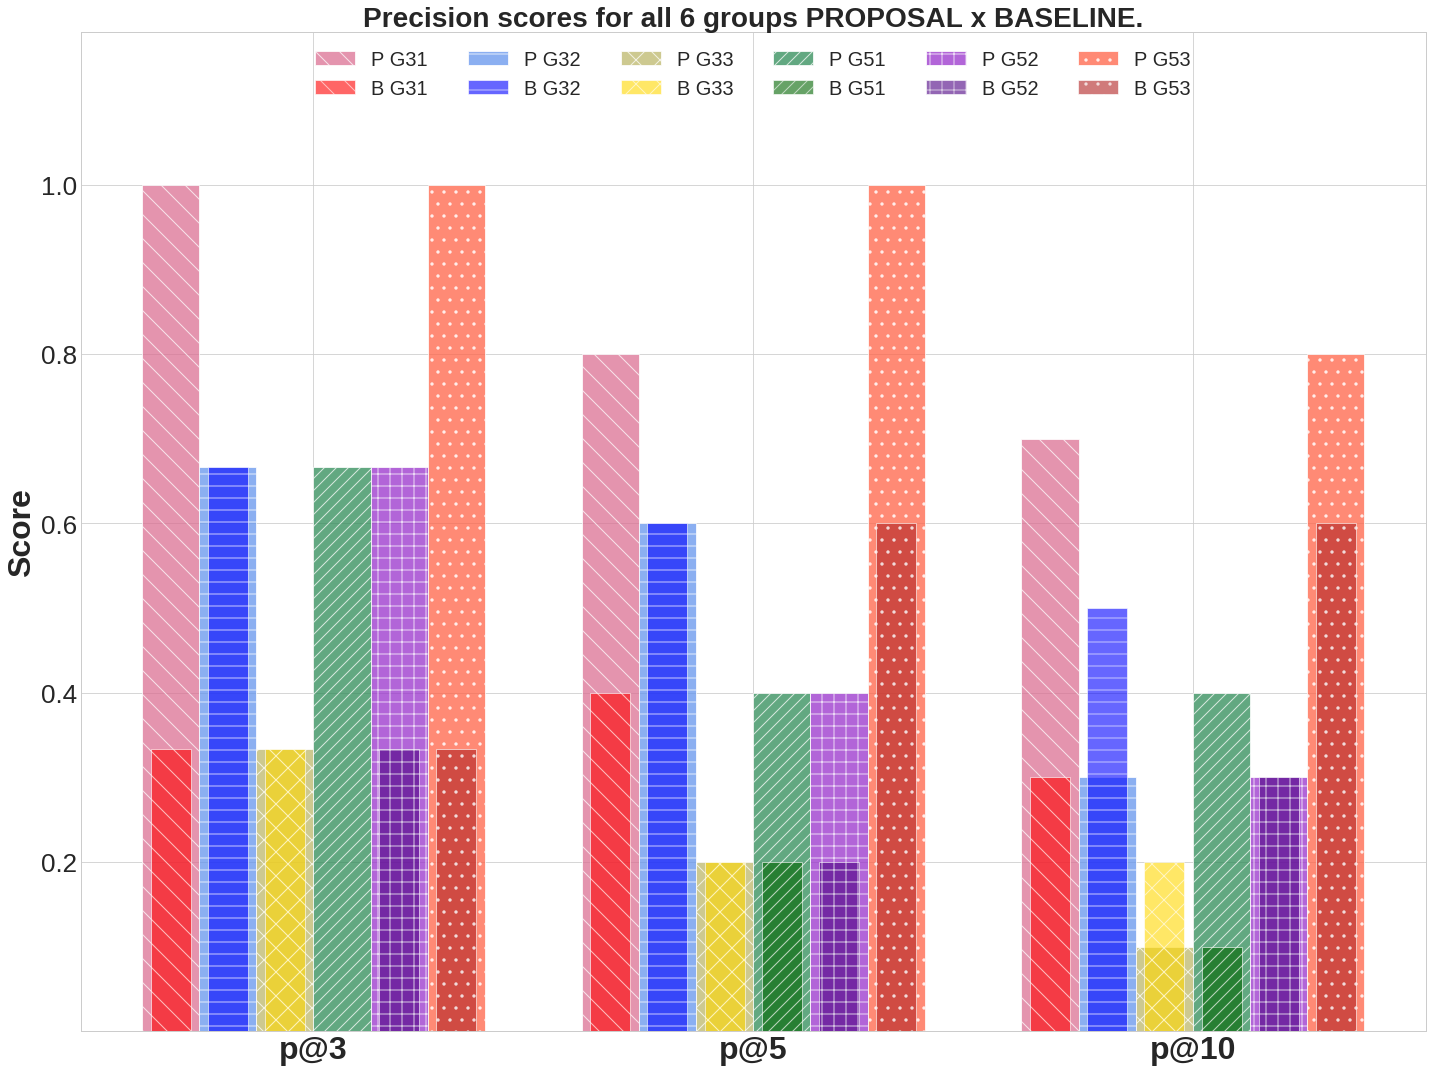

In [39]:
plt.rcParams['figure.figsize'] = (20,15)

# data to plot
n = 3
precision_g_31 = [groups_p_at_3[0], groups_p_at_5[0], groups_p_at_10[0]]
precision_g_32 = [groups_p_at_3[1], groups_p_at_5[1], groups_p_at_10[1]]
precision_g_33 = [groups_p_at_3[2], groups_p_at_5[2], groups_p_at_10[2]]
precision_g_51 = [groups_p_at_3[3], groups_p_at_5[3], groups_p_at_10[3]]
precision_g_52 = [groups_p_at_3[4], groups_p_at_5[4], groups_p_at_10[4]]
precision_g_53 = [groups_p_at_3[5], groups_p_at_5[5], groups_p_at_10[5]]

precision_bl_g_31 = [groups_baseline_p_at_3[0], groups_baseline_p_at_5[0], groups_baseline_p_at_10[0]]
precision_bl_g_32 = [groups_baseline_p_at_3[1], groups_baseline_p_at_5[1], groups_baseline_p_at_10[1]]
precision_bl_g_33 = [groups_baseline_p_at_3[2], groups_baseline_p_at_5[2], groups_baseline_p_at_10[2]]
precision_bl_g_51 = [groups_baseline_p_at_3[3], groups_baseline_p_at_5[3], groups_baseline_p_at_10[3]]
precision_bl_g_52 = [groups_baseline_p_at_3[4], groups_baseline_p_at_5[4], groups_baseline_p_at_10[4]]
precision_bl_g_53 = [groups_baseline_p_at_3[5], groups_baseline_p_at_5[5], groups_baseline_p_at_10[5]]

# m_baseline = [m_bl_p3, m_bl_p5, m_bl_p10]
# m_standard = [m_p3_s, m_p5_s, m_p10_s]
# m_greedy = [m_p3_g, m_p5_g, m_p10_g]
# m_random = [m_p3_r, m_p5_r, m_p10_r]

print(precision_g_31, precision_g_32, precision_g_33, precision_g_51, precision_g_52, precision_g_53)
print("###")
print(precision_bl_g_31, precision_bl_g_32, precision_bl_g_33, precision_bl_g_51, precision_bl_g_52, precision_bl_g_53)
print("###")

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.13
bl_width = 0.7
opacity = 0.75
bl_opacity = 0.6


line1 = plt.bar(index, precision_g_31, bar_width, alpha=opacity, color='palevioletred', label='P G31', hatch="\\", edgecolor='white')
line01 = plt.bar(index, precision_bl_g_31, bl_width*bar_width, alpha=bl_opacity, color='r', label='B G31', hatch="\\", edgecolor='white')

line2 = plt.bar(index + bar_width, precision_g_32, bar_width, alpha=opacity, color='cornflowerblue',  label='P G32', hatch="-", edgecolor='white')
line02 = plt.bar(index + bar_width, precision_bl_g_32, bl_width*bar_width, alpha=bl_opacity, color='b',  label='B G32', hatch="-", edgecolor='white')

line3 = plt.bar(index + bar_width + bar_width, precision_g_33, bar_width, alpha=opacity, color='darkkhaki', label='P G33', hatch="x", edgecolor='white')
line03 = plt.bar(index + bar_width + bar_width, precision_bl_g_33, bl_width*bar_width, alpha=bl_opacity, color='gold', label='B G33', hatch="x", edgecolor='white')

line4 = plt.bar(index + bar_width + bar_width + bar_width, precision_g_51, bar_width, alpha=opacity, color='seagreen', label='P G51', hatch="//", edgecolor='white')
line04 = plt.bar(index + bar_width + bar_width + bar_width, precision_bl_g_51, bl_width*bar_width, alpha=bl_opacity, color='darkgreen', label='B G51', hatch="//", edgecolor='white')

line5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, precision_g_52, bar_width, alpha=opacity, color='darkorchid', label='P G52', hatch="+", edgecolor='white')
line05 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, precision_bl_g_52, bl_width*bar_width, alpha=bl_opacity, color='indigo', label='B G52', hatch="+", edgecolor='white')

line6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, precision_g_53, bar_width, alpha=opacity, color='tomato', label='P G53', hatch=".", edgecolor='white')
line06 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, precision_bl_g_53, bl_width*bar_width, alpha=bl_opacity, color='firebrick', label='B G53', hatch=".", edgecolor='white')


# plt.xlabel('Precision@', fontweight="bold", fontsize=28)
plt.ylabel('Score', fontweight="bold", fontsize=32)
plt.title('Precision scores for all 6 groups PROPOSAL x BASELINE.', fontweight="bold", fontsize=28)
plt.xticks(index + bar_width + bar_width + 0.5*bar_width, ('p@3', 'p@5', 'p@10'), fontweight="bold", fontsize=32)
plt.yticks(fontsize=26)

plt.legend(fontsize=20, ncol=6, loc='upper center')

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.0001,1.18])

# plt.savefig('pecrision_scores_prop_and_baseline_apprch_all_groups_square_fit.png', transparent=True)
plt.tight_layout()
plt.show()

In [31]:
def average(lst):
    return sum(lst) / len(lst)

In [32]:
avg_score_p_3 = average(groups_score_p_at_3)
avg_score_p_5 = average(groups_score_p_at_5)
avg_score_p_10 = average(groups_score_p_at_10)

print("Precision @ 3 AVERAGE for the SCORE: {}\n".format(avg_score_p_3))
print("Precision @ 5 AVERAGE for the SCORE: {}\n".format(avg_score_p_5))
print("Precision @ 10 AVERAGE for the SCORE: {}\n".format(avg_score_p_10))

Precision @ 3 AVERAGE for the SCORE: 0.7222222222222222

Precision @ 5 AVERAGE for the SCORE: 0.5666666666666667

Precision @ 10 AVERAGE for the SCORE: 0.43333333333333335



In [33]:
avg_baseline_p_3 = average(groups_baseline_p_at_3)
avg_baseline_p_5 = average(groups_baseline_p_at_5)
avg_baseline_p_10 = average(groups_baseline_p_at_10)

print("Precision @ 3 AVERAGE for the BASELINE: {}\n".format(avg_baseline_p_3))
print("Precision @ 5 AVERAGE for the BASELINE: {}\n".format(avg_baseline_p_5))
print("Precision @ 10 AVERAGE for the BASELINE: {}\n".format(avg_baseline_p_10))

Precision @ 3 AVERAGE for the BASELINE: 0.3333333333333333

Precision @ 5 AVERAGE for the BASELINE: 0.36666666666666664

Precision @ 10 AVERAGE for the BASELINE: 0.3333333333333333



[0.7222222222222222, 0.5666666666666667, 0.43333333333333335] [0.3333333333333333, 0.36666666666666664, 0.3333333333333333]


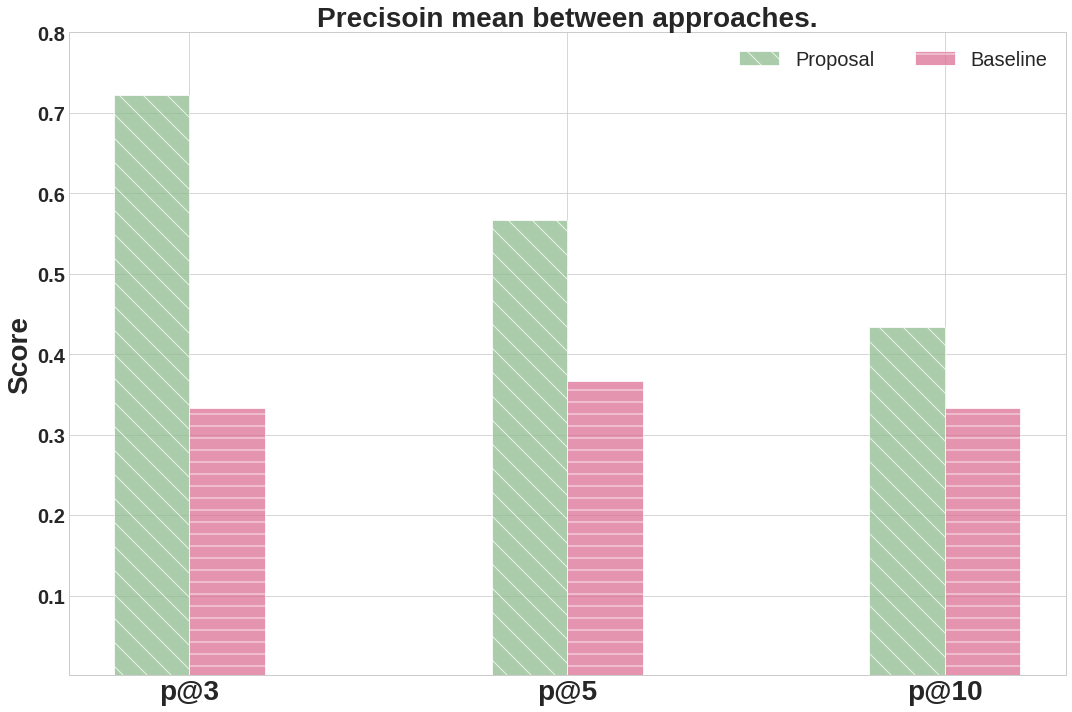

In [34]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 3

# precision_avg_at_3 = [avg_truth_p_3, avg_baseline_p_3]
# precision_avg_at_5 = [avg_truth_p_5, avg_baseline_p_5]
# precision_avg_at_10 = [avg_truth_p_10, avg_baseline_p_10]

score_avg = [avg_score_p_3, avg_score_p_5, avg_score_p_10]
baseline_avg = [avg_baseline_p_3, avg_baseline_p_5, avg_baseline_p_10]


# m_baseline = [m_bl_p3, m_bl_p5, m_bl_p10]
# m_standard = [m_p3_s, m_p5_s, m_p10_s]
# m_greedy = [m_p3_g, m_p5_g, m_p10_g]
# m_random = [m_p3_r, m_p5_r, m_p10_r]

print(score_avg, baseline_avg)

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.75

line1 = plt.bar(index, score_avg, bar_width, alpha=opacity, color='darkseagreen', label='Proposal', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, baseline_avg, bar_width, alpha=opacity, color='palevioletred',  label='Baseline', hatch="-", edgecolor='white')
# line3 = plt.bar(index + bar_width + bar_width, precision_avg_at_10, bar_width, alpha=opacity, color='cornflowerblue', label='G33', hatch="x", edgecolor='white')
# line4 = plt.bar(index + bar_width + bar_width + bar_width, precision_g_51, bar_width, alpha=opacity, color='darkkhaki', label='G51', hatch="//", edgecolor='white')
# line5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, precision_g_52, bar_width, alpha=opacity, color='mediumpurple', label='G52', hatch="+", edgecolor='white')
# line6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, precision_g_53, bar_width, alpha=opacity, color='skyblue', label='G53', hatch=".", edgecolor='white')


# plt.xlabel('Precision@', fontweight="bold", fontsize=28)
plt.ylabel('Score', fontweight="bold", fontsize=28)
plt.title('Precisoin mean between approaches.', fontweight="bold", fontsize=28)
# plt.title('Média da Precisão entre os métodos.', fontweight="bold", fontsize=28)
plt.xticks(index + 0.1, ('p@3', 'p@5', 'p@10'), fontweight="bold", fontsize=28)
plt.yticks(fontweight="bold", fontsize=20)

plt.legend(fontsize=20, ncol=6)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.001,.8])

# plt.savefig('precision_average_between_approaches.png', transparent=True)
plt.tight_layout()
plt.show()